In [1]:
print("hello")

hello


In [2]:
!pip install torch


In [29]:
import torch
import matplotlib.pyplot as plt
import torch.linalg as linalg
import matplotlib.pyplot as plt

In [15]:


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

In [16]:
mean_A=torch.tensor([-0.5,-0.5])
cov_A=torch.tensor([[1,0.25],[0.25,1]])

In [17]:
mean_B=torch.tensor([0.5,0.5])
cov_B=torch.tensor([[1,0.25],[0.25,1]])

In [59]:
num_samples = 1000

# For distribution A
U_A, S_A, Vt_A = linalg.svd(cov_A)
S_A_diag = torch.diag(S_A)
Z_A = torch.randn(num_samples, 2)
samples_A = mean_A + (Z_A @ (U_A @ S_A_diag @ Vt_A))

# For distribution B
U_B, S_B, Vt_B = linalg.svd(cov_B)
S_B_diag = torch.diag(S_B)
Z_B = torch.randn(num_samples, 2)
samples_B = mean_B + (Z_B @ (U_B @ S_B_diag @ Vt_B))


In [19]:
# Stack the samples into a single tensor
X = torch.cat([samples_A, samples_B], dim=0)

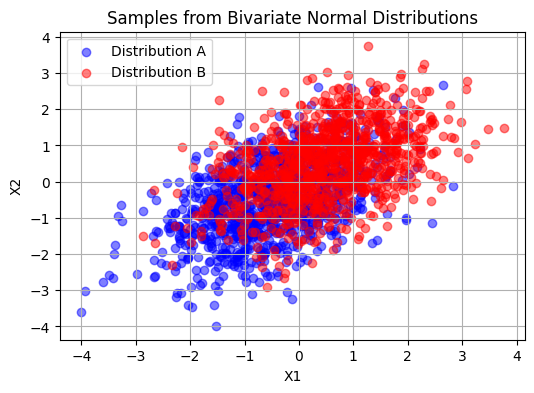

Shape of X: torch.Size([2000, 2])


In [58]:


# Plot the samples
plt.figure(figsize=(6, 4))
plt.scatter(samples_A[:, 0].numpy(), samples_A[:, 1].numpy(), color='blue', label='Distribution A', alpha=0.5)
plt.scatter(samples_B[:, 0].numpy(), samples_B[:, 1].numpy(), color='red', label='Distribution B', alpha=0.5)
plt.title('Samples from Bivariate Normal Distributions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
samples_A.shape

torch.Size([1000, 2])

In [22]:
samples_B

tensor([[ 0.5523,  1.5459],
        [ 2.1047,  1.2398],
        [-0.7768,  0.1587],
        ...,
        [ 1.0260,  1.5207],
        [ 0.1178,  0.7752],
        [ 1.0290,  2.4972]])

In [23]:
X.shape

torch.Size([2000, 2])

In [26]:
def kmeans(X,k,iterations=100):
    num_samples,num_features = X.shape
    centroids = X[torch.randint(0,num_samples,(k,))]
    for iteration in range(iterations):
        distances = torch.cdist(X,centroids) 
        labels=torch.argmin(distances,dim=1) 
        #recalculation of centroids
        new_centroids=torch.zeros_like(centroids)
        for i in range(k):
            points_in_cluster=X[labels==i]
            if points_in_cluster.shape[0]>0:
                new_centroids[i]=points_in_cluster.mean(dim=0)
            
        if torch.allclose(centroids,new_centroids):
            break
        centroids=new_centroids
    return centroids, labels

In [56]:
def plotting(X,centroids,labels,k):
    plt.figure(figsize=(4,3))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow']
    
    for i in range(k):
        cluster_points = X[labels == i]  # Get points belonging to cluster i
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    color=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.6)
    

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')
    
    plt.title('K-Means Clustering, k={}'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    plt.legend()
    plt.grid()
    plt.show()
    

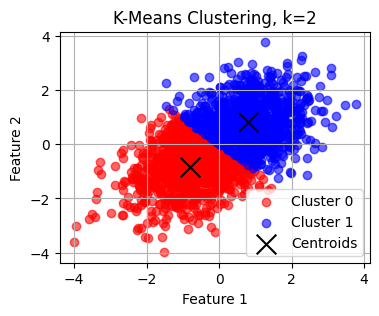

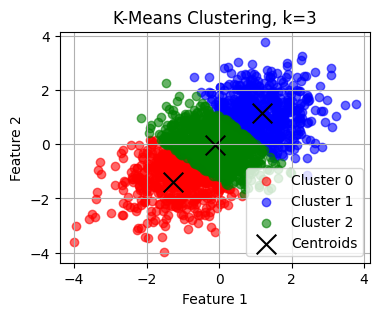

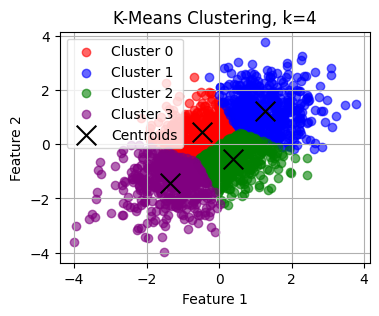

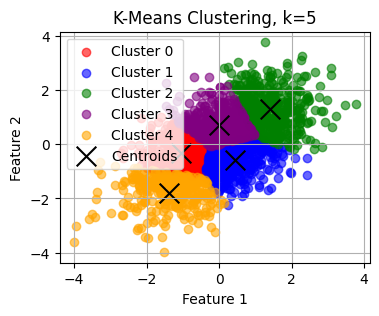

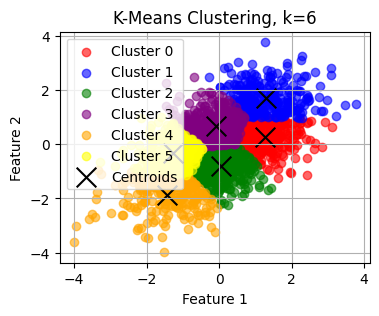

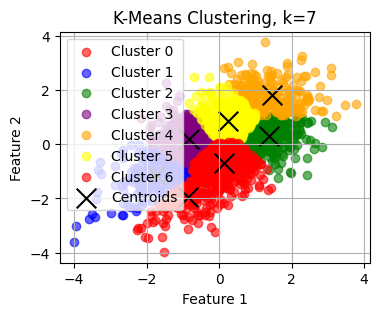

In [57]:
#assiging different values for k
for k in range(2,8):
    centroids,labels=kmeans(X,k)
    plotting(X,centroids,labels,k)


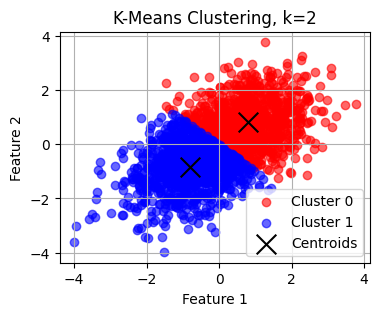

tensor([[ 0.7882,  0.8284],
        [-0.7992, -0.8475]])

In [62]:
#we conclude , k=2 is best approach
centroids,labels=kmeans(X,2)
plotting(X,centroids,labels,2)
centroids 